In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import sys
base_path = ".."
sys.path.append(f"{base_path}")
import pandas as pd
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib as mpl
from itertools import combinations

from utils.gnn_utils import *
from utils.utils import *

In [3]:
experiment_dir = f"{base_path}/experiments"
experiment_name = "experiment_bulk_real"
experiment_path = f"{experiment_dir}/{experiment_name}"


In [8]:
# load sample names and celltype names
celltypes = load_celltypes(f"{experiment_path}/datasets/celltypes.txt")
sample_names = load_sample_names(f"{experiment_path}/datasets/sample_names.txt")

In [6]:
_, ground_truth = load_real_groundtruth(f"{base_path}/data/bulk/gt_GSE120502.txt")
ground_truth

,Monocytes,Bcells,CD4Tcells,NK,CD8Tcells,Unknown
Sample Name,,,,,,
GSM3401977,0.172534,0.018500,0.227708,0.204966,0.247036,0.129256
GSM3402008,0.115657,0.118000,0.424474,0.020343,0.252148,0.069378
GSM3402021,0.146797,0.026500,0.372364,0.093703,0.230895,0.129741
GSM3401914,0.152514,0.067924,0.336056,0.124614,0.244128,0.074765
GSM3401898,0.112720,0.060200,0.355509,0.200080,0.201267,0.070224
...,...,...,...,...,...,...
GSM3402044,0.038977,0.041500,0.406614,0.117523,0.341652,0.053734
GSM3401820,0.187896,0.141000,0.368804,0.123104,0.141384,0.037812
GSM3401832,0.043924,0.035500,0.394400,0.120576,0.363200,0.042400


## Load original DISSECT results

In [9]:
# load celltype abundance data
results_per_seed = []
for i in range(5):
    df = pd.read_csv(
        f"{experiment_path}/dissect_fractions_{i}.txt", index_col=0, delimiter="\t"
    )
    results_per_seed.append(df)
ensemble_result = pd.read_csv(
    f"{experiment_path}/dissect_fractions_ens.txt", index_col=0, delimiter="\t"
)


In [26]:
for result in results_per_seed:
    mean_corr, corrs = calc_mean_corr_df(result, ground_truth, verbose=1)
    mean_rmse, rmses = calc_mean_rmse_df(result, ground_truth, verbose=1)

Mean Correlation: 0.599969257974604
Mean RMSE: 0.06578640927676517
Mean Correlation: 0.6079319596168885
Mean RMSE: 0.061998815784270224
Mean Correlation: 0.5843566012040636
Mean RMSE: 0.06132513785485935
Mean Correlation: 0.5873467863667244
Mean RMSE: 0.07663924970775139
Mean Correlation: 0.6062475675056218
Mean RMSE: 0.06233225218137493


In [27]:
# compare each against each other and put into boxplot

for df_1, df_2 in combinations(results_per_seed, 2):
    mean_corr, corrs = calc_mean_corr_df(df_1, df_2, verbose=1)
    mean_rmse, rmses = calc_mean_rmse_df(df_1, df_2, verbose=1)

Mean Correlation: 0.9718482539234184
Mean RMSE: 0.02017337821453
Mean Correlation: 0.9723171249949826
Mean RMSE: 0.018469918602832543
Mean Correlation: 0.9666911155147012
Mean RMSE: 0.021136765921223627
Mean Correlation: 0.963883326906141
Mean RMSE: 0.04273654112826939
Mean Correlation: 0.9826604691698214
Mean RMSE: 0.01269422266066248
Mean Correlation: 0.9740625734899374
Mean RMSE: 0.027248389380687906
Mean Correlation: 0.9807202771845641
Mean RMSE: 0.0341049124566537
Mean Correlation: 0.9759483147185573
Mean RMSE: 0.030254317227404303
Mean Correlation: 0.9769398682647311
Mean RMSE: 0.03358839648121536
Mean Correlation: 0.9611967457916363
Mean RMSE: 0.050522549445438665


## Load new results

In [17]:
new_result = pd.read_csv(f"{experiment_path}/new_predictions.csv", index_col=0)

## Compare results

In [28]:

for result in results_per_seed:
    mean_corr, corrs = calc_mean_corr_df(result, new_result, verbose=1)
    mean_rmse, rmses = calc_mean_rmse_df(result, new_result, verbose=1)

Mean Correlation: 0.9627104122432448
Mean RMSE: 0.027876113220465387
Mean Correlation: 0.9670835593110171
Mean RMSE: 0.03280566539140289
Mean Correlation: 0.9638880790674174
Mean RMSE: 0.03516558608010623
Mean Correlation: 0.9621909629943692
Mean RMSE: 0.02355888606585883
Mean Correlation: 0.9576354922712352
Mean RMSE: 0.04256051354083721


In [41]:
mean_corr, gt_corrs_new = calc_mean_corr_df(new_result, ground_truth, verbose=1)
mean_rmse, gt_rmses_new = calc_mean_rmse_df(new_result, ground_truth, verbose=1)

mean_corr, gt_corrs_old = calc_mean_corr_df(ensemble_result, ground_truth, verbose=1)
mean_rmse, gt_rmses_old = calc_mean_rmse_df(ensemble_result, ground_truth, verbose=1)

Mean Correlation: 0.6059357034755309
Mean RMSE: 0.07676738366400154
Mean Correlation: 0.6026500259299641
Mean RMSE: 0.06275806971691952


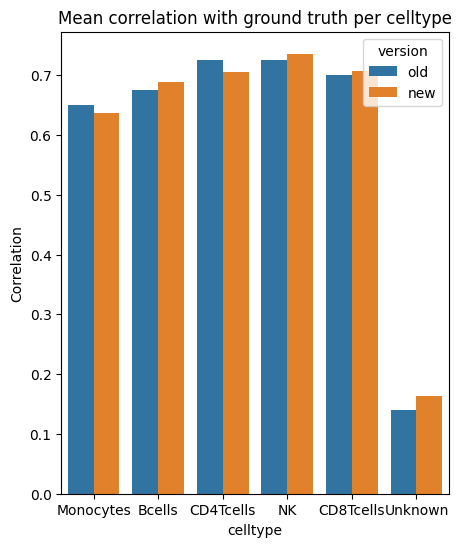

In [63]:
# plot results
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
corr_data = [gt_corrs_old, gt_corrs_new]
corr_data = pd.DataFrame(corr_data)
corr_data.columns = ground_truth.columns
corr_data["version"] = ["old", "new"]
corr_data = corr_data.melt(id_vars="version", var_name="celltype", value_name="Correlation")
corr_data
sns.barplot(data=corr_data, x="celltype", y="Correlation", ax=ax, hue="version")
ax.set_title("Mean correlation with ground truth per celltype")
plt.savefig(f"{base_path}/figures/mean_corr_bulk.png", dpi=300, bbox_inches="tight")

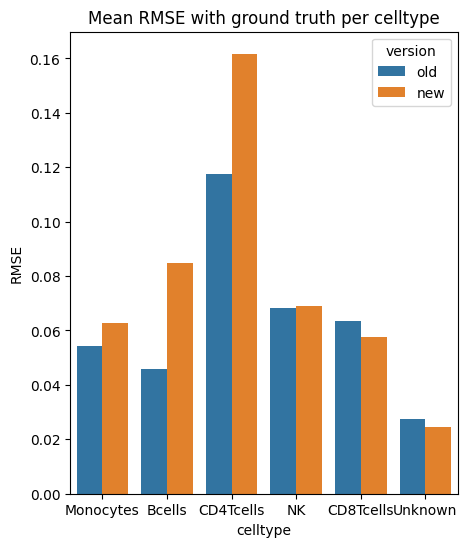

In [64]:
# plot results
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
rmse_data = [gt_rmses_old, gt_rmses_new]
rmse_data = pd.DataFrame(rmse_data)
rmse_data.columns = ground_truth.columns
rmse_data["version"] = ["old", "new"]
rmse_data = rmse_data.melt(id_vars="version", var_name="celltype", value_name="RMSE")
rmse_data
sns.barplot(data=rmse_data, x="celltype", y="RMSE", ax=ax, hue="version")
ax.set_title("Mean RMSE with ground truth per celltype")
plt.savefig(f"{base_path}/figures/mean_rmse_bulk.png", dpi=300, bbox_inches="tight")